# Linear wave equation

# $\frac{\partial u}{\partial t} + a\frac{\partial u}{\partial x} = 0$

Where the constant "$a$" is wave speed.

# Dependencies
python module require for computation and visualization

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display
%matplotlib inline

SyntaxError: invalid syntax (<ipython-input-28-fc1c4db48411>, line 5)

## Discretization
Turning a partial differntial equation into system of algebraic equation

$\frac{u^{n+1} - u^n}{\Delta t} - a \frac{u^n - u^{n-1}}{\Delta x}$

Rearring the terms we get

$u^{n+1} =  u^n - \frac{a\Delta t}{\Delta x}{u^n - u^{n-1}}$


# Discontinous initial wave form: Square wave

In [12]:
def squrewave(x1,x2,x, value):
  '''
  function return a square wave for given inputs
  Inputs:
  x -> grid on which square wave is defined
  x1 -> minimum extent of non-zero value
  x2 -> maximum extent of non-zero value
  value->
  '''
  u = np.zeros(x.size)
  i = np.abs(x-x1).argmin()
  j = np.abs(x-x2).argmin()
  u[i:j]=value
  return u

In [13]:
#inialize to square wave
usoln = squrewave(0.2,0.4,x,2)
uftbs = squrewave(0.2,0.4,x,2)
uftcs = squrewave(0.2,0.4,x,2)
uftfs = squrewave(0.2,0.4,x,2)

# Grid
The base grid for the comutation

In [11]:
# Set the parameters
## Number of grid points
npoints = 101

## Minimum and Maximum extent of the domain
xmin = 0.0
xmax = 1.0

# Define grid
x, dx= np.linspace(xmin, xmax, npoints, endpoint=True, retstep=True)

## Visualize the grid and initial condition using matplotlib

Text(0, 0.5, 'exact solution')

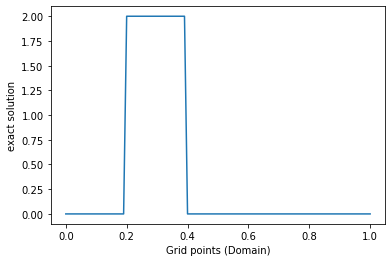

In [14]:
plt.plot(x, usoln)
plt.xlabel('Grid points (Domain)')
plt.ylabel('exact solution')

## FTBS
## Forward in time and backward in space

# $\frac{u_i^{n+1} - u_i^n}{\Delta t} - a \frac{u_{i}^n - u_{i-1}^{n}}{\Delta x}$

Rearring the terms we get

# $u_i^{n+1} =  u_i^n - \frac{a\Delta t}{\Delta x}{u_i^n - u_{i-1}^{n}}$

## we define CFL = $\frac{a\Delta t}{\Delta x}$

<hr>

## FTFS
## Forward in time and forward in space

# $\frac{u_i^{n+1} - u_i^n}{\Delta t} - a \frac{u_{i+1}^n - u_{i}^{n}}{\Delta x}$

Rearring the terms we get

# $u_i^{n+1} =  u_i^n - \frac{a\Delta t}{\Delta x}{u_{i+1}^n - u_{i}^{n}}$


<hr>

## FTCS
## Forward in time and centeral in space

# $u_i^{n+1} =  u_i^n - 0.5\frac{a\Delta t}{\Delta x}{u_{i+1}^n - u_{i-1}^{n}}$

<hr>

# Problem parameters

In [18]:
## Maximum number of iterations to run
maxiter = 10

## wave speed
a = 1.0

## CFL number
cfl = 0.5

# Smooth initial condition: Sine wave

In [19]:
#sine wave
k = 4 #wave number
usoln = np.sin(2*np.pi*k*x)
uftbs = np.sin(2*np.pi*k*x)
uftcs = np.sin(2*np.pi*k*x)
uftfs = np.sin(2*np.pi*k*x)

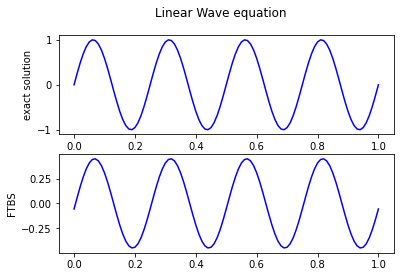

In [31]:
fig, axs = plt.subplots(2)
fig.suptitle("Linear Wave equation")
lnsoln, = axs[0].plot(x,usoln, 'b-', label='True Solution')
axs[0].set_ylabel('exact solution')
lnftbs, = axs[1].plot(x,uftbs, 'b-', label='FTBS')
axs[1].set_ylabel('FTBS')


dt = cfl * dx / np.abs(a)

for iter in range(maxiter):
    usoln[:] =  np.sin(2*np.pi*k*(x-a*(iter*dt)))
    #usoln = squrewave(0.2+a*iter*dt, 0.4+a*iter*dt,x,2)
    uftbs[1:] = uftbs[1:] - a*dt/dx*(uftbs[1:] - uftbs[:-1])
    uftbs[0] = uftbs[-1]
    #plt.plot(x, uftbs)
    #display.clear_output(wait=True)
    #display.display(plt.gcf())
    #time.sleep(0.5)
    lnsoln.set_ydata(usoln)
    lnftbs.set_ydata(uftbs)
    plt.pause(0.01)

plt.show()